In [38]:
import numpy as np
import pandas as pd

# review
import itertools
import json
import matplotlib.backends.backend_pdf
import pathlib
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib.gridspec import SubplotSpec
from matplotlib.pylab import rcParams
from mpl_toolkits.axes_grid1 import make_axes_locatable

from data.datasets import get_catalyst_data
from catalyst_fund_eda import CatalystFundEDA
from catalyst_report import CatalystReport
from data.datasets import available_data

palette_status = {"FUNDED": '#0570b0', # blue
                 "NOT FUNDED": '#cb181d', # red
                 "NOT APPROVED": '#ec7014'} # orange

# CATALYST FUND EDA

In [2]:
# load CatalystFundEAD objects
catalyst_f_eda = {}
for f in available_data().keys():
    catalyst_f_eda[f] = CatalystFundEDA(f)
    
    print('\n-----------------')
    print(' FUND: ', catalyst_f_eda[f].fund)
    print('\nChallenges:')
    display(catalyst_f_eda[f].challenges)


-----------------
 FUND:  f3

Challenges:


0          DApp creation
1    Developer ecosystem
2       Community choice
Name: challenge, dtype: object


-----------------
 FUND:  f4

Challenges:


0              DApp&Integrations
1            Developer ecosystem
2    Distributed decision making
3              Proposer Outreach
4      Catalyst Value Onboarding
5        Local Community Centers
6        Fund6 Challenge Setting
7         Sponsored by leftovers
Name: challenge, dtype: object


-----------------
 FUND:  f5

Challenges:


0                Developer ecosystem
1                  DApp&Integrations
2        Distributed decision making
3                  Proposer Outreach
4          Catalyst Value Onboarding
5                 Metadata challenge
6       Grow Africa, Grow Cardano wv
7    Scale-UP Cardanos DeFi Ecosyste
8         Fund7 Challenge Setting wv
9             Sponsored by leftovers
Name: challenge, dtype: object


-----------------
 FUND:  f6

Challenges:


0                 Developer ecosystem
1                DApps & Integrations
2         Distributed decision making
3                   Proposer outreach
4           Catalyst value onboarding
5                            Metadata
6           Grow Africa, Grow Cardano
7     Scale-UP Cardano’s DeFi Ecosyst
8       Cardano Emerging Threat Alarm
9              Multilingual resources
10    DeFi and Microlending for Afric
11       DLT Entrepreneurship Toolbox
12    Partnerships for Global Adoptio
13                NFT Business models
14    Atala PRISM DID Mass-Scale Adop
15      Disaster When all is at stake
16    Scale-UP Cardano’s Community Hu
17      Improve and Grow Auditability
18            Fund7 challenge setting
19             Sponsored by leftovers
Name: challenge, dtype: object


-----------------
 FUND:  f7

Challenges:


0     A.I. & SingularityNet a $5T mar
1     Accelerate Decentralized Identi
2              Boosting Cardanos DeFi
3     Catalyst - Rapid Funding Mechan
4      Catalyst Accelerator & Mentors
5     Catalyst Natives COTI Pay with 
6                    Community Events
7        Connecting Japan日本 Community
8                      DAOs ❤ Cardano
9                DApps & Integrations
10    Disarm cyber disinformation att
11                  Gamers On-Chained
12     Global Sustainable Indep. SPOs
13    Grow Latin America, Grow Cardan
14      Improve and Grow Auditability
15    Lobbying for favorable legislat
16    MiniLow-Budget Dapps & Integrat
17            Miscellaneous Challenge
18             Multilingual resources
19              Nation Building Dapps
20     New SPO Business Opportunities
21    Open Source Developer Ecosystem
22    Scale-UP Cardanos Community Hub
23    Seeding Cardanos Grassroots DeF
24            Fund8 challenge setting
25             Sponsored by leftovers
Name: challe


-----------------
 FUND:  f8

Challenges:


0     Accelerate Decentralized Identi
1      Business Solutions (B2B & B2C)
2           Cardano scaling solutions
3      Community Advisor Improvements
4           Cross-Chain Collaboration
5              DApps and Integrations
6                 Developer Ecosystem
7     Film + Media (FAM) creatives un
8                 Gamers On - Chained
9           Grow Africa, Grow Cardano
10       Grow East Asia, Grow Cardano
11           Grow India, Grow Cardano
12      Improve and Grow Auditability
13    Lobbying for favorable legislat
14            Miscellaneous Challenge
15              Nation Building Dapps
16              New Member Onboarding
17    Open Source Development Ecosyst
18    Open Standards & Interoperabili
19    Scale-UP Cardanos Community Hub
20            Self-Sovereign Identity
21    The Great Migration (from Ether
22            Fund9 challenge setting
23                Funded by leftovers
Name: challenge, dtype: object

In [3]:
eg = 'f5'
fund_obj = catalyst_f_eda[eg]
print('>> e.g. FUND DEFAULT RESULTS')
display(fund_obj.results.head(2))
print('\n>> e.g. CHALLANGE-SPECIFIC RESULTS')
display(fund_obj.get_challenge_results(fund_obj.challenges[0]).head(2))

>> e.g. FUND DEFAULT RESULTS


,challenge,Budget,Proposal,SCORE,YES,NO,Unique Yes,Unique No,Result,STATUS,REQUESTED $,REQUESTED %
0,Developer ecosystem,600000,Testnet Cardanoscan Explorer,5.00,885478111,27844494,4863,168,857633617,FUNDED,7500,1.250000
1,Developer ecosystem,600000,Cardano Rust SDK update for Alonzo,4.54,554450995,21710291,2153,102,532740704,FUNDED,50000,8.333333



>> e.g. CHALLANGE-SPECIFIC RESULTS


,Proposal,Link to ideascale,SCORE,Unique Yes,Unique No,Votes casted,YES,NO,Result,Meets approval threshold,REQUESTED $,STATUS,FUND DEPLETION,Reason for not funded status,challenge,Budget,REQUESTED %
0,Testnet Cardanoscan Explorer,http://app.ideascale.com/t/UM5UZBivb,5.00,4863,168,4946.0,885478111,27844494,857633617,YES,7500,FUNDED,592500,NaN,Developer ecosystem,600000,1.250000
1,Cardano Rust SDK update for Alonzo,http://app.ideascale.com/t/UM5UZBitW,4.54,2153,102,2255.0,554450995,21710291,532740704,YES,50000,FUNDED,542500,NaN,Developer ecosystem,600000,8.333333


## Fund Statistics

In [4]:
'''
Statistics of Funded, Not Funded and Not Approved proposals: 
    average score, 
    a minimum score of a Funded proposal in each challenge, 
    maximum score of a Not Funded proposal in each challenge, 
    absolute numbers and percentages of Funded, 
    Not Funded and Not Approved proposals
'''

'\nStatistics of Funded, Not Funded and Not Approved proposals: \n    average score, \n    a minimum score of a Funded proposal in each challenge, \n    maximum score of a Not Funded proposal in each challenge, \n    absolute numbers and percentages of Funded, \n    Not Funded and Not Approved proposals\n'

### Distribution and Table

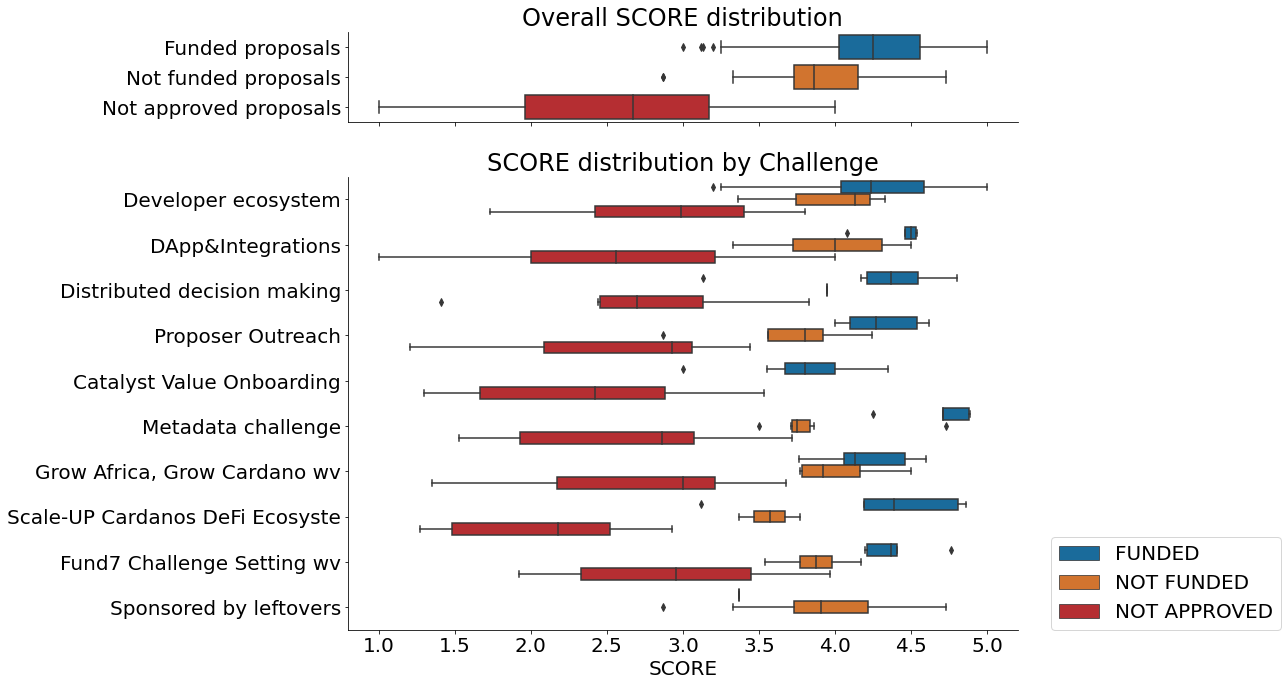

SCORE                            \
                                              count    count%      mean   min   
challenge                       STATUS                                          
ALL CHALLENGES                  FUNDED         75.0  0.245902  4.226667  3.00   
                                NOT APPROVED  143.0  0.468852  2.577552  1.00   
                                NOT FUNDED     87.0  0.285246  3.921724  2.87   
Catalyst Value Onboarding       FUNDED         10.0  0.526316  3.811000  3.00   
                                NOT APPROVED    9.0  0.473684  2.280000  1.30   
DApp&Integrations               FUNDED          5.0  0.061728  4.422000  4.08   
                                NOT APPROVED   57.0  0.703704  2.567368  1.00   
                                NOT FUNDED     19.0  0.234568  3.992632  3.33   
Developer ecosystem             FUNDED         24.0  0.558140  4.237083  3.20   
                                NOT APPROVED   16.0  0.372093  2.870000  1.73   
                                NOT FUNDED      3.0  0.069767  3.940000  3.36   
Distributed decision making     FUNDED          6.0  0.461538  4.238333  3.13   
                                NOT APPROVED    6.0  0.461538  2.715000  1.41   
                                NOT FUNDED      1.0  0.076923  3.950000  3.95   
Fund7 Challenge Setting wv      FUNDED          5.0  0.217391  4.390000  4.20   
                                NOT APPROVED    8.0  0.347826  2.935000  1.92   
                                NOT FUNDED     10.0  0.434783  3.878000  3.54   
Grow Africa, Grow Cardano wv    FUNDED          8.0  0.296296  4.212500  3.76   
                                NOT APPROVED   15.0  0.555556  2.720000  1.35   
                                NOT FUNDED      4.0  0.148148  4.027500  3.77   
Metadata challenge              FUNDED          5.0  0.250000  4.688000  4.25   
                                NOT APPROVED    9.0  0.450000  2.632222  1.53   
                                NOT FUNDED      6.0  0.300000  3.883333  3.50   
Proposer Outreach               FUNDED          6.0  0.315789  4.305000  4.00   
                                NOT APPROVED    9.0  0.473684  2.507778  1.21   
                                NOT FUNDED      4.0  0.210526  3.677500  2.87   
Scale-UP Cardanos DeFi Ecosyste FUNDED          5.0  0.238095  4.274000  3.12   
                                NOT APPROVED   14.0  0.666667  2.070000  1.27   
                                NOT FUNDED      2.0  0.095238  3.570000  3.37   
Sponsored by leftovers          FUNDED          1.0  0.025641  3.370000  3.37   
                                NOT FUNDED     38.0  0.974359  3.934737  2.87   

                                                   REQUESTED %            \
                                               max       count    count%   
challenge                       STATUS                                     
ALL CHALLENGES                  FUNDED        5.00        75.0  0.245902   
                                NOT APPROVED  4.00       143.0  0.468852   
                                NOT FUNDED    4.73        87.0  0.285246   
Catalyst Value Onboarding       FUNDED        4.35        10.0  0.526316   
                                NOT APPROVED  3.53         9.0  0.473684   
DApp&Integrations               FUNDED        4.54         5.0  0.061728   
                                NOT APPROVED  4.00        57.0  0.703704   
                                NOT FUNDED    4.50        19.0  0.234568   
Developer ecosystem             FUNDED        5.00        24.0  0.558140   
                                NOT APPROVED  3.80        16.0  0.372093   
                                NOT FUNDED    4.33         3.0  0.069767   
Distributed decision making     FUNDED        4.80         6.0  0.461538   
                                NOT APPROVED  3.83         6.0  0.461538   
                                NOT FUNDED    3.95         1.0  0.076923   

In [5]:
f='f5'
fund_obj = catalyst_f_eda[f]
fund_obj.plot_distribution()
fund_obj.get_statistics(feats=['SCORE', 'REQUESTED %'], metrics=['count', 'count%', 'mean', 'min', 'max'])

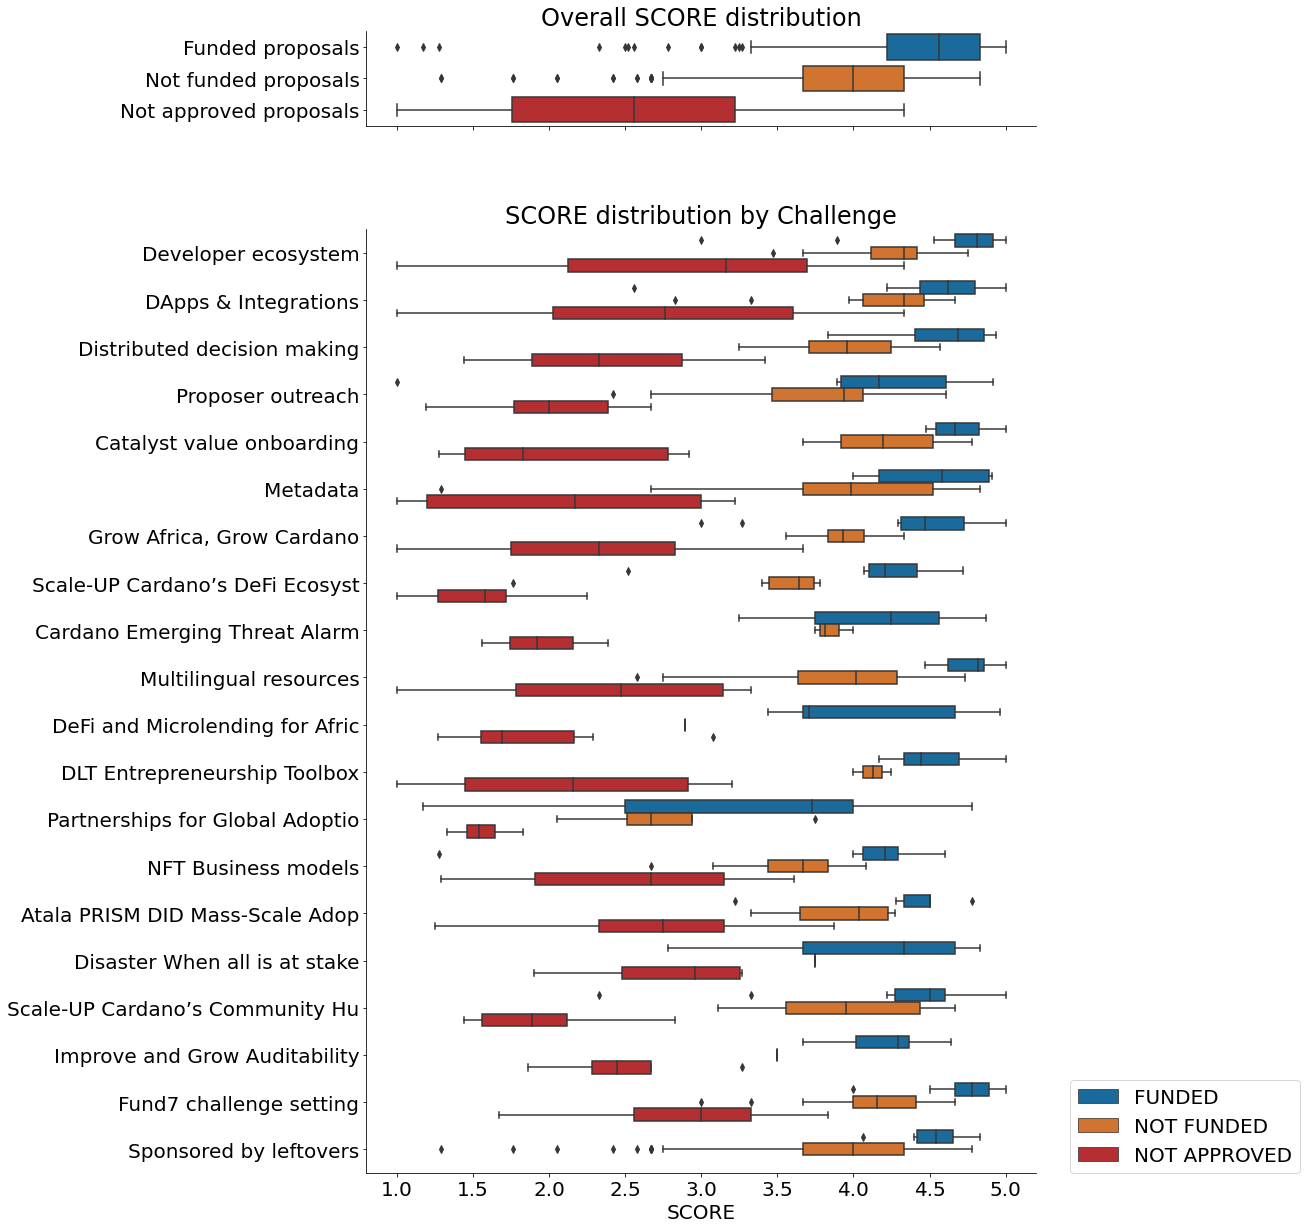

SCORE                            \
                                              count    count%      mean   min   
challenge                       STATUS                                          
ALL CHALLENGES                  FUNDED        172.0  0.194350  4.384767  1.00   
                                NOT APPROVED  343.0  0.387571  2.517988  1.00   
                                NOT FUNDED    370.0  0.418079  3.940703  1.29   
Atala PRISM DID Mass-Scale Adop FUNDED          9.0  0.204545  4.336667  3.22   
                                NOT APPROVED   23.0  0.522727  2.638261  1.25   
...                                             ...       ...       ...   ...   
Scale-UP Cardano’s DeFi Ecosyst FUNDED          6.0  0.285714  4.033333  2.52   
                                NOT APPROVED    9.0  0.428571  1.582222  1.00   
                                NOT FUNDED      6.0  0.285714  3.330000  1.76   
Sponsored by leftovers          FUNDED          6.0  0.033898  4.506667  4.06   
                                NOT FUNDED    171.0  0.966102  3.919357  1.29   

                                                   REQUESTED %            \
                                               max       count    count%   
challenge                       STATUS                                     
ALL CHALLENGES                  FUNDED        5.00       172.0  0.194350   
                                NOT APPROVED  4.33       343.0  0.387571   
                                NOT FUNDED    4.83       370.0  0.418079   
Atala PRISM DID Mass-Scale Adop FUNDED        4.78         9.0  0.204545   
                                NOT APPROVED  3.87        23.0  0.522727   
...                                            ...         ...       ...   
Scale-UP Cardano’s DeFi Ecosyst FUNDED        4.72         6.0  0.285714   
                                NOT APPROVED  2.25         9.0  0.428571   
                                NOT FUNDED    3.78         6.0  0.285714   
Sponsored by leftovers          FUNDED        4.83         6.0  0.033898   
                                NOT FUNDED    4.78       171.0  0.966102   

                                                                               
                                                   mean       min         max  
challenge                       STATUS                                         
ALL CHALLENGES                  FUNDED        10.973771  0.003000   60.000000  
                                NOT APPROVED  22.564566  0.000400  100.000000  
                                NOT FUNDED    19.459439  0.248756  141.101502  
Atala PRISM DID Mass-Scale Adop FUNDED        11.033333  4.000000   19.200000  
                                NOT APPROVED  27.815652  2.000000  100.000000  
...                                                 ...       ...         ...  
Scale-UP Cardano’s DeFi Ecosyst FUNDED        16.386667  3.120000   24.000000  
                                NOT APPROVED  33.977822  0.000400   80.000000  
                                NOT FUNDED     9.833333  1.800000   23.600000  
Sponsored by leftovers          FUNDED        16.493956  2.768927   30.344409  
                                NOT FUNDED    23.403897  1.517220  141.101502  

[62 rows x 10 columns]

In [7]:
f='f6'
fund_obj = catalyst_f_eda[f]
fund_obj.plot_distribution()
fund_obj.get_statistics(feats=['SCORE', 'REQUESTED %'], metrics=['count', 'count%', 'mean', 'min', 'max'])

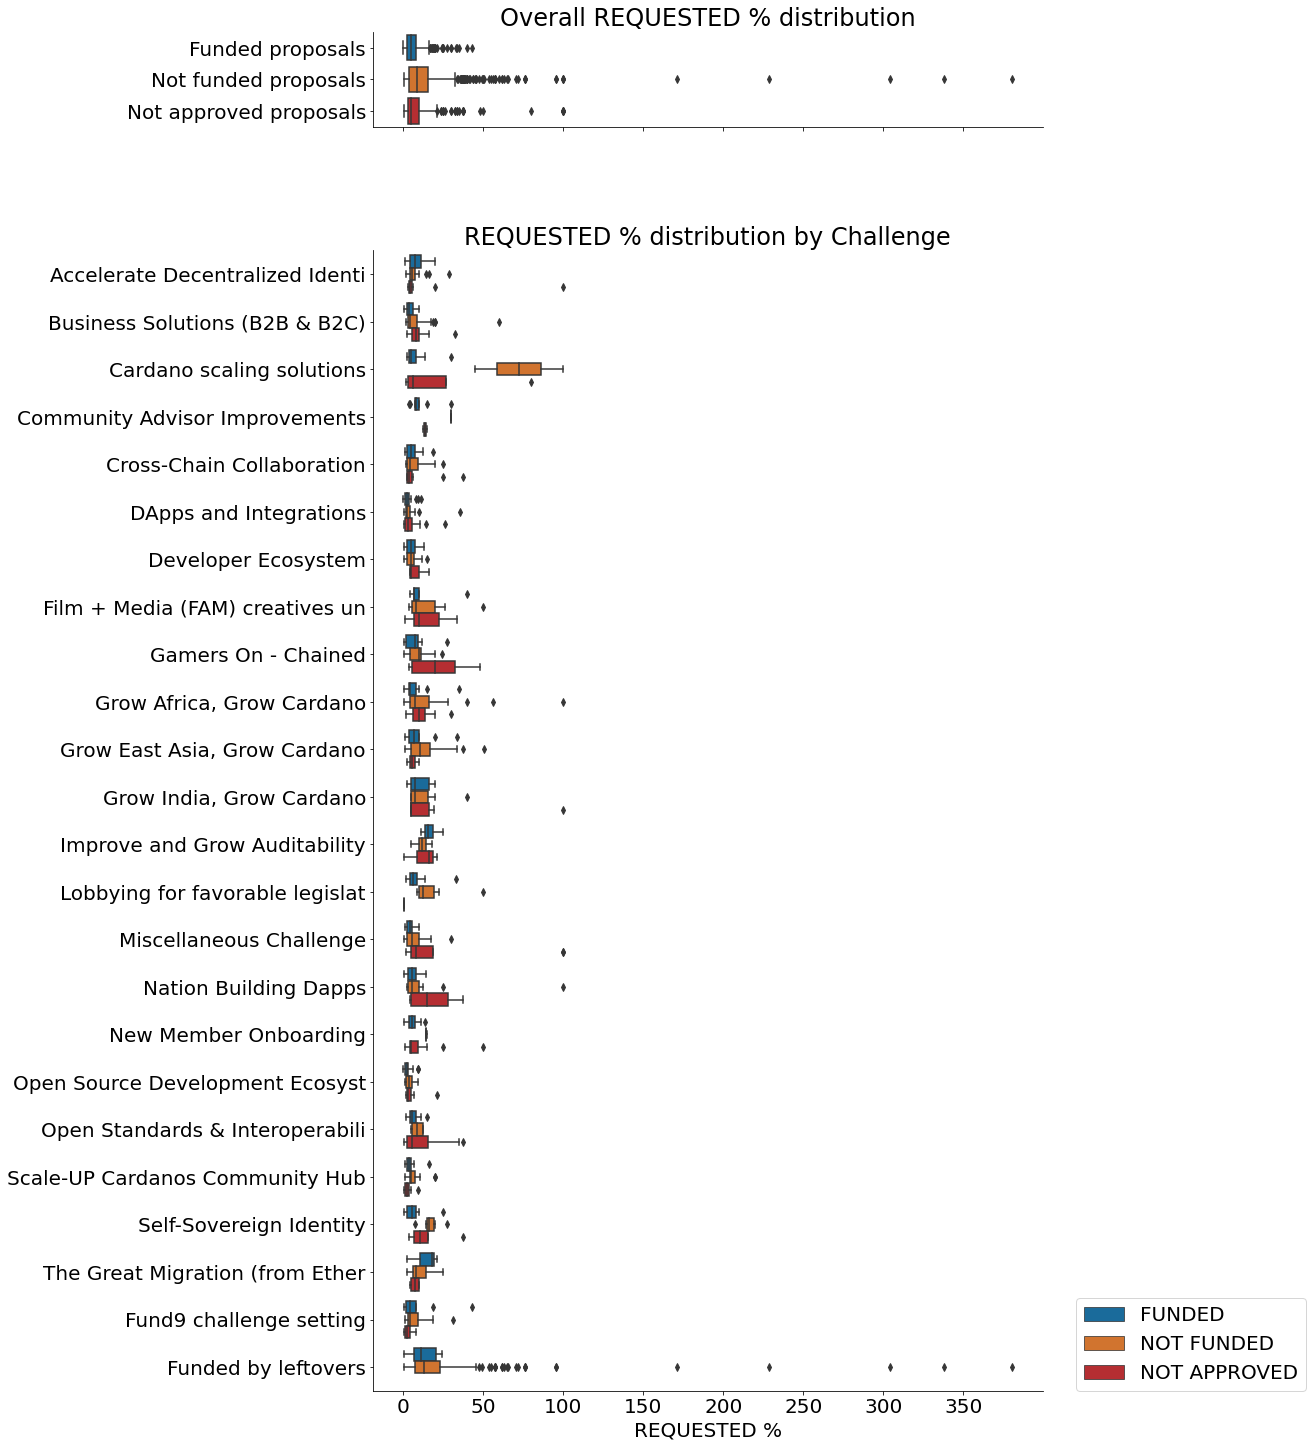

SCORE                      \
                                               count    count%      mean   
challenge                       STATUS                                     
ALL CHALLENGES                  FUNDED         379.0  0.233806  4.347625   
                                NOT APPROVED   223.0  0.137569  3.157534   
                                NOT FUNDED    1019.0  0.628624  3.828803   
Accelerate Decentralized Identi FUNDED          12.0  0.315789  4.395833   
                                NOT APPROVED    10.0  0.263158  3.112000   
...                                              ...       ...       ...   
Self-Sovereign Identity         NOT APPROVED     7.0  0.250000  3.291429   
                                NOT FUNDED       6.0  0.214286  4.408333   
The Great Migration (from Ether FUNDED           7.0  0.318182  3.661429   
                                NOT APPROVED     4.0  0.181818  3.260000   
                                NOT FUNDED      11.0  0.500000  4.025455   

                                                         REQUESTED %  \
                                               min   max       count   
challenge                       STATUS                                 
ALL CHALLENGES                  FUNDED        1.20  5.00       379.0   
                                NOT APPROVED  1.08  4.44       223.0   
                                NOT FUNDED    1.17  4.92      1019.0   
Accelerate Decentralized Identi FUNDED        2.39  5.00        12.0   
                                NOT APPROVED  1.78  3.86        10.0   
...                                            ...   ...         ...   
Self-Sovereign Identity         NOT APPROVED  2.00  4.28         7.0   
                                NOT FUNDED    3.78  4.78         6.0   
The Great Migration (from Ether FUNDED        2.05  4.88         7.0   
                                NOT APPROVED  1.73  3.83         4.0   
                                NOT FUNDED    2.47  4.62        11.0   

                                                                          \
                                                count%       mean    min   
challenge                       STATUS                                     
ALL CHALLENGES                  FUNDED        0.233806   6.213017  0.040   
                                NOT APPROVED  0.137569  10.373773  0.180   
                                NOT FUNDED    0.628624  13.647105  0.320   
Accelerate Decentralized Identi FUNDED        0.315789   8.223200  1.285   
                                NOT APPROVED  0.263158  15.270000  2.800   
...                                                ...        ...    ...   
Self-Sovereign Identity         NOT APPROVED  0.250000  13.592857  3.750   
                                NOT FUNDED    0.214286  16.954167  7.500   
The Great Migration (from Ether FUNDED        0.318182  14.234286  2.340   
                                NOT APPROVED  0.181818   7.205000  4.000   
                                NOT FUNDED    0.500000  10.401255  2.100   

                                                          
                                                     max  
challenge                       STATUS                    
ALL CHALLENGES                  FUNDED         42.968750  
                                NOT APPROVED  100.000000  
                                NOT FUNDED    380.416175  
Accelerate Decentralized Identi FUNDED         20.000000  
                                NOT APPROVED  100.000000  
...                                                  ...  
Self-Sovereign Identity         NOT APPROVED   37.500000  
                                NOT FUNDED     27.500000  
The Great Migration (from Ether FUNDED         20.900000  
                                NOT APPROVED   10.000000  
                                NOT FUNDED     25.000000  

[74 rows x 10 columns]

In [8]:
f='f8'
fund_obj = catalyst_f_eda[f]
fund_obj.plot_distribution('REQUESTED %')
fund_obj.get_statistics(feats=['SCORE', 'REQUESTED %'], metrics=['count', 'count%', 'mean', 'min', 'max'])

### SWARM PLOT

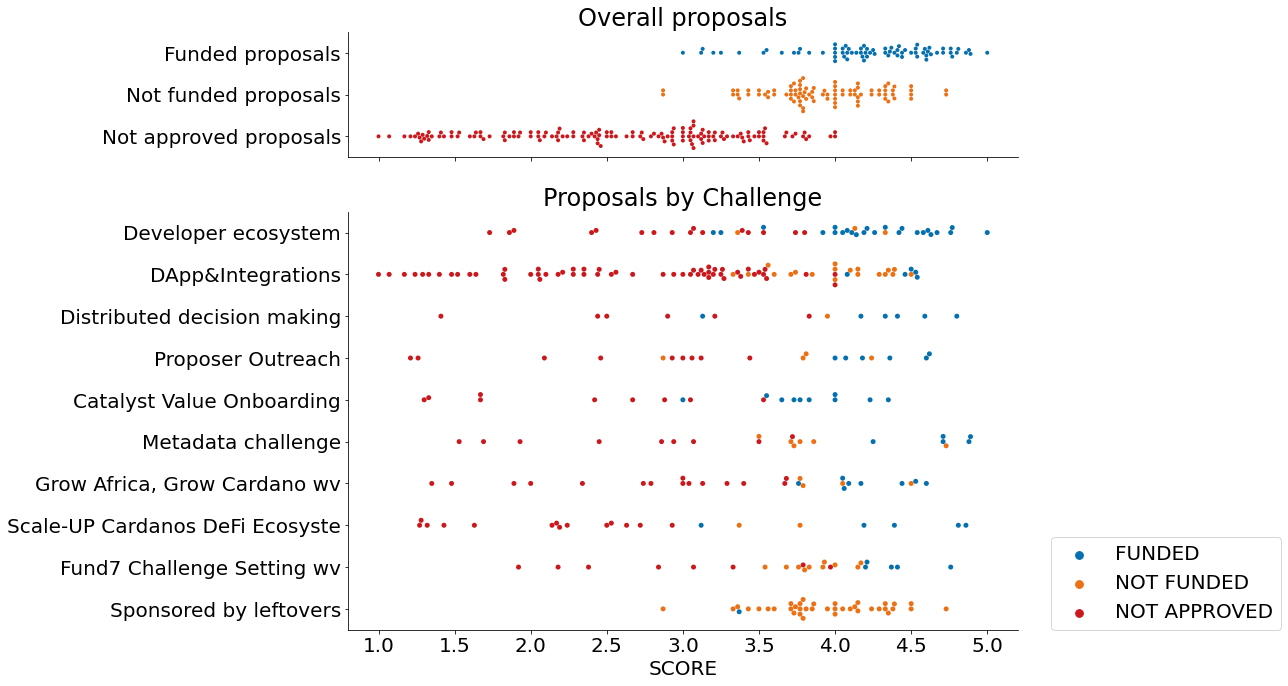

In [9]:
f='f5'
fund_obj = catalyst_f_eda[f]
fund_obj.plot_swarm()

/home/julianabmattos/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 22.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/julianabmattos/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 47.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/julianabmattos/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 29.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/julianabmattos/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/julianabmattos/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_ag

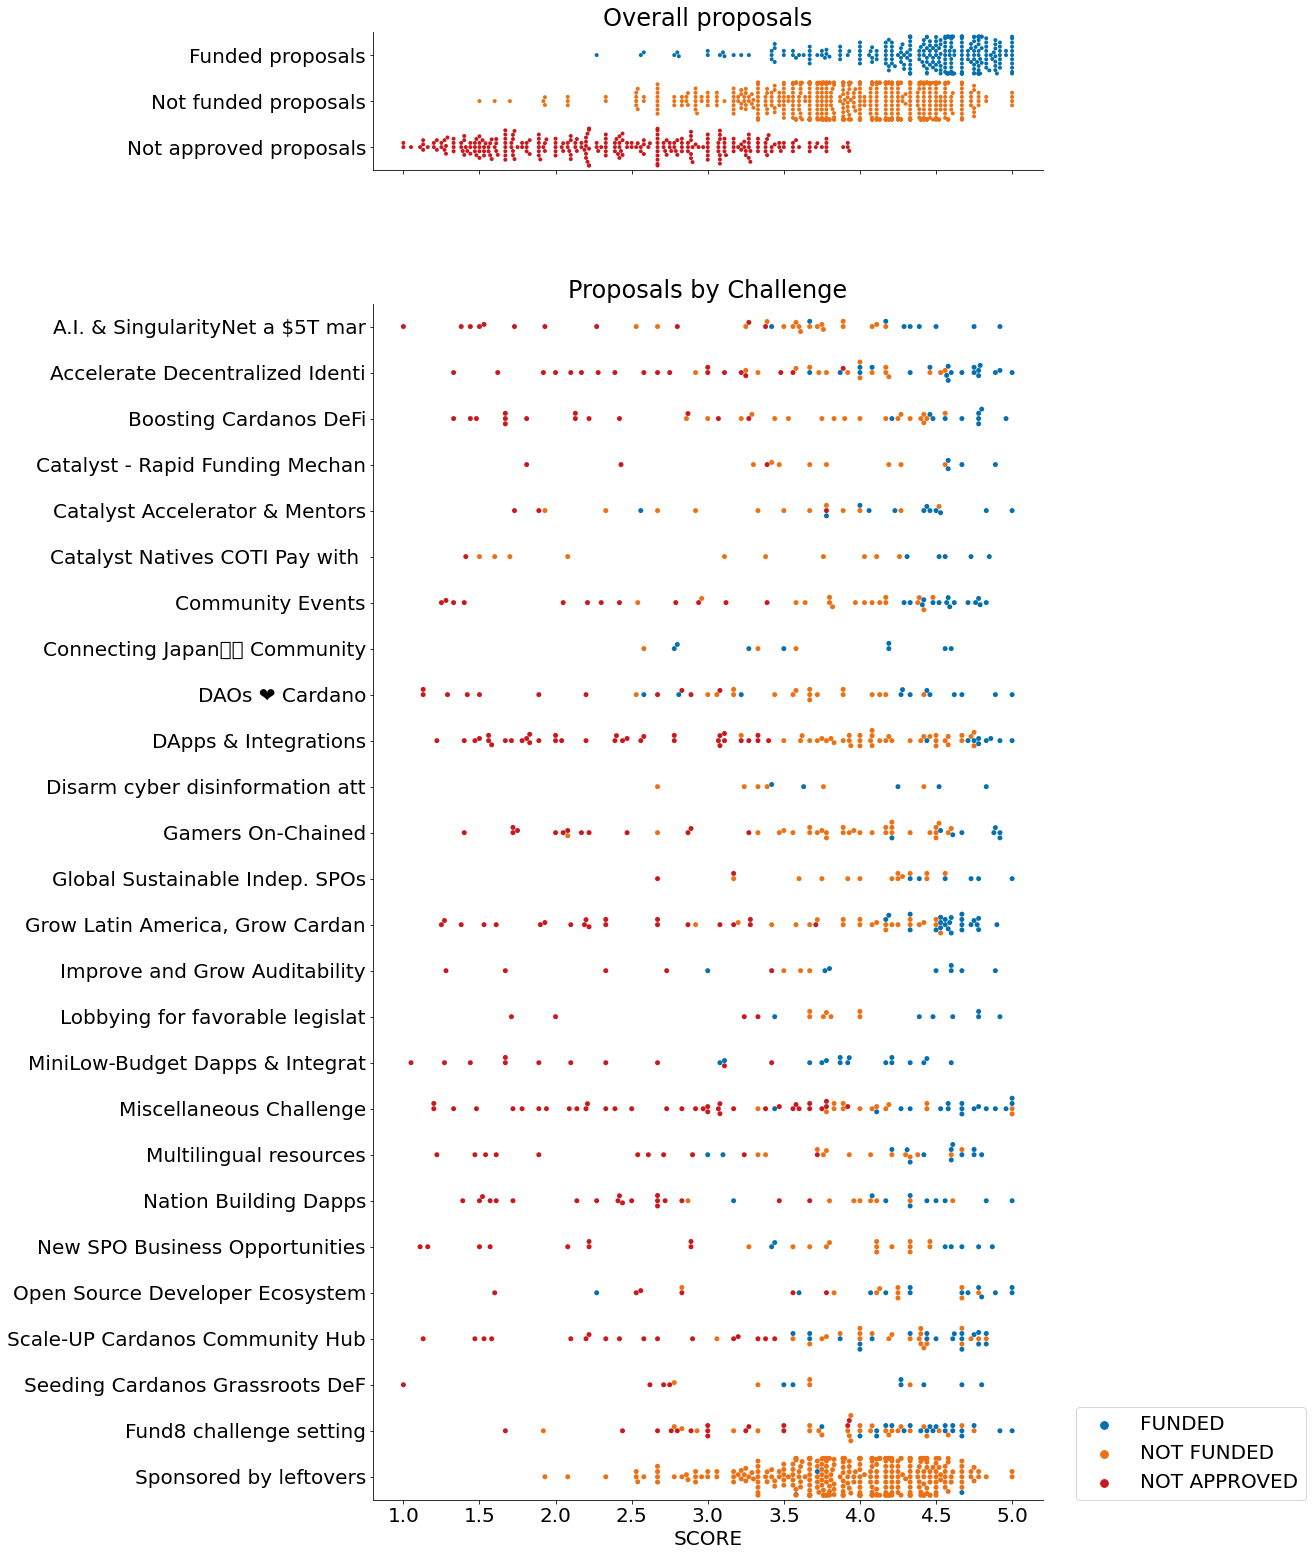

In [10]:
f='f7'
fund_obj = catalyst_f_eda[f]
fund_obj.plot_swarm()

/home/julianabmattos/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 16.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/julianabmattos/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 41.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/julianabmattos/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 27.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/julianabmattos/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 21.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


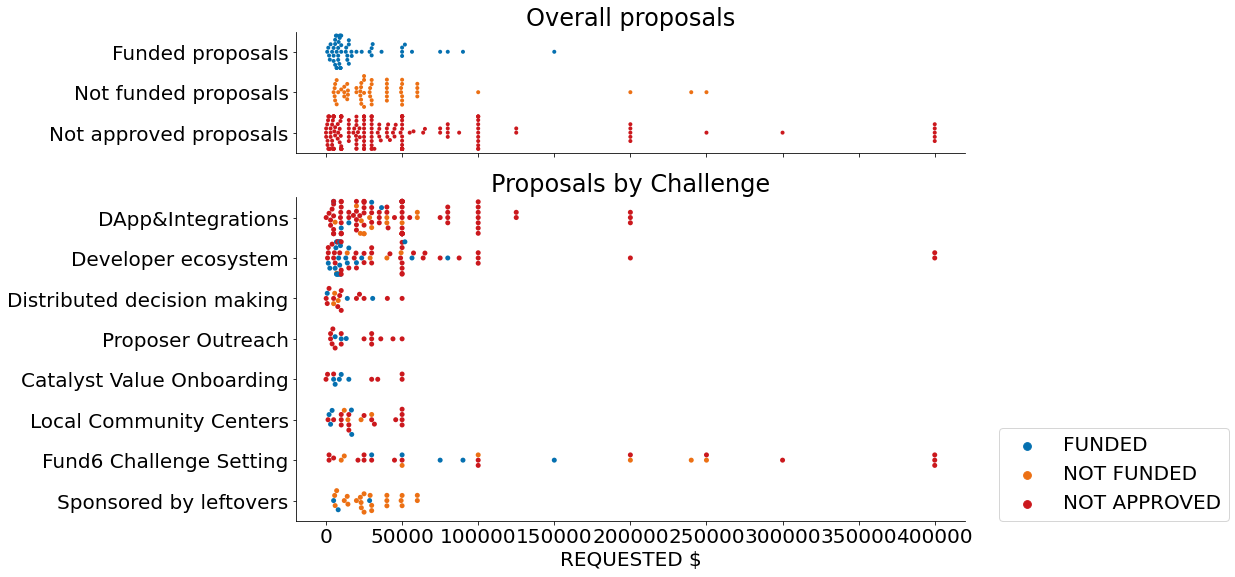

In [11]:
f='f4'
fund_obj = catalyst_f_eda[f]
fund_obj.plot_swarm('REQUESTED $')

### LM PLOTS

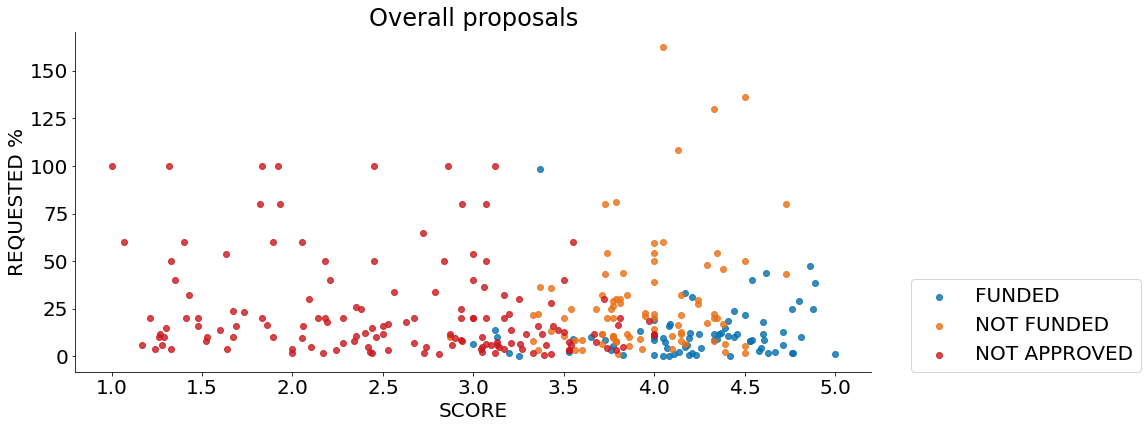

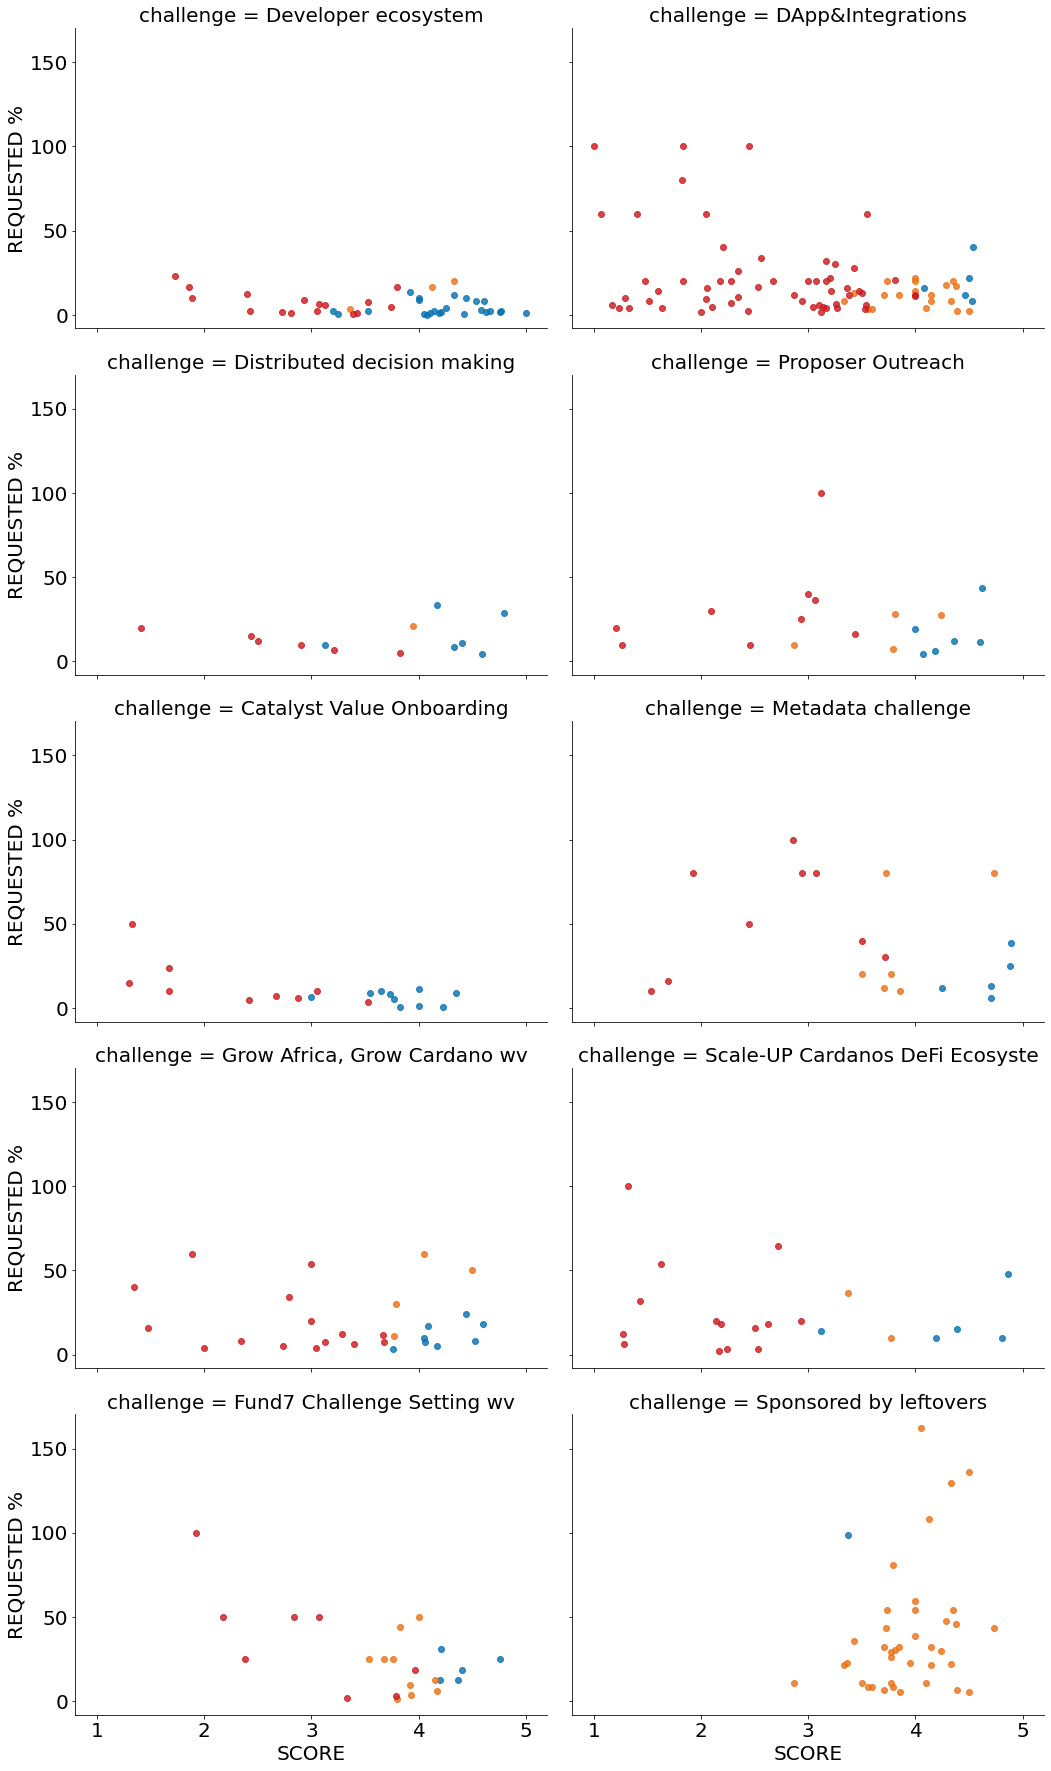

In [12]:
f='f5'
fund_obj = catalyst_f_eda[f]
x_feat = 'SCORE'
y_feat = 'REQUESTED %'
fit_reg = False
fund_obj.plot_lm(x_feat, y_feat)

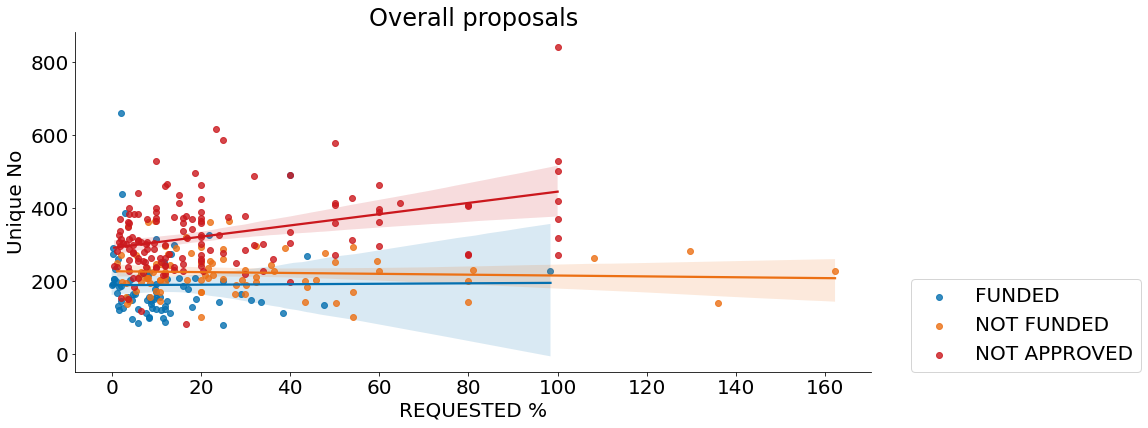

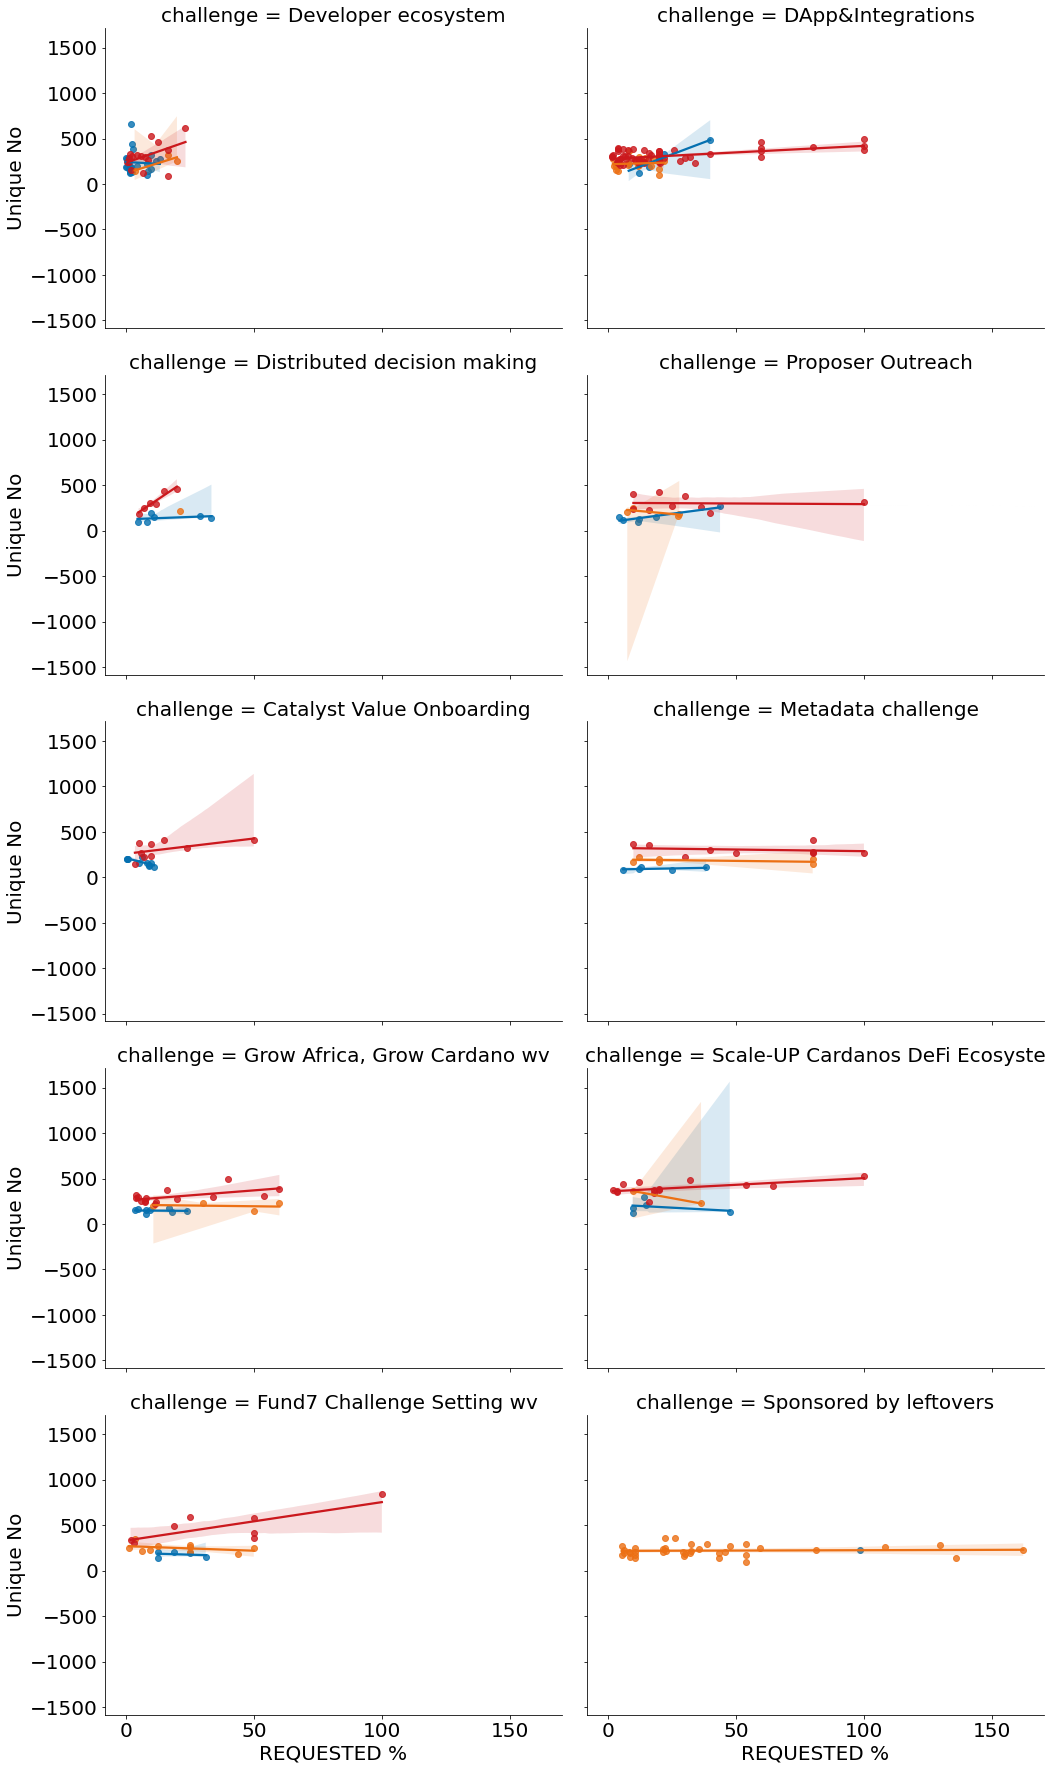

In [13]:
f='f5'
fund_obj = catalyst_f_eda[f]
x_feat = 'REQUESTED %'
y_feat = 'Unique No'
fit_reg = True
fund_obj.plot_lm(x_feat, y_feat, fit_reg)

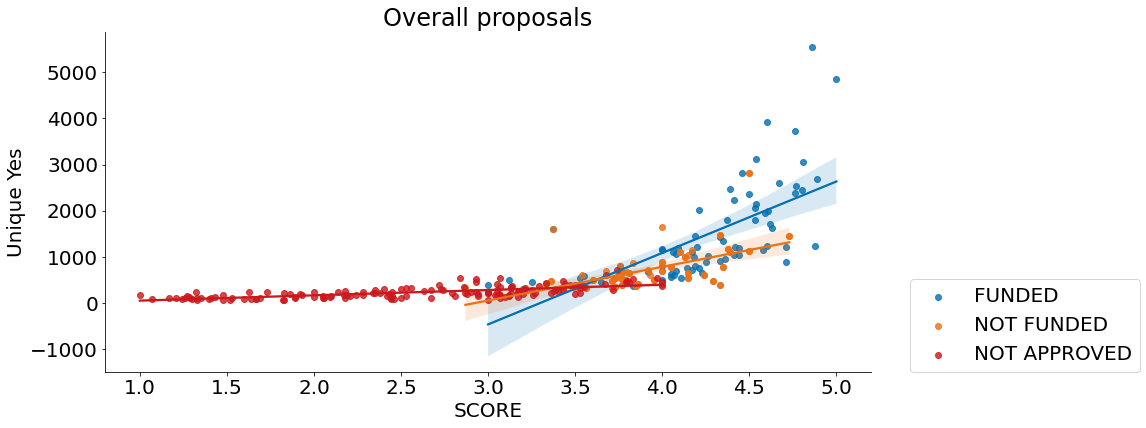

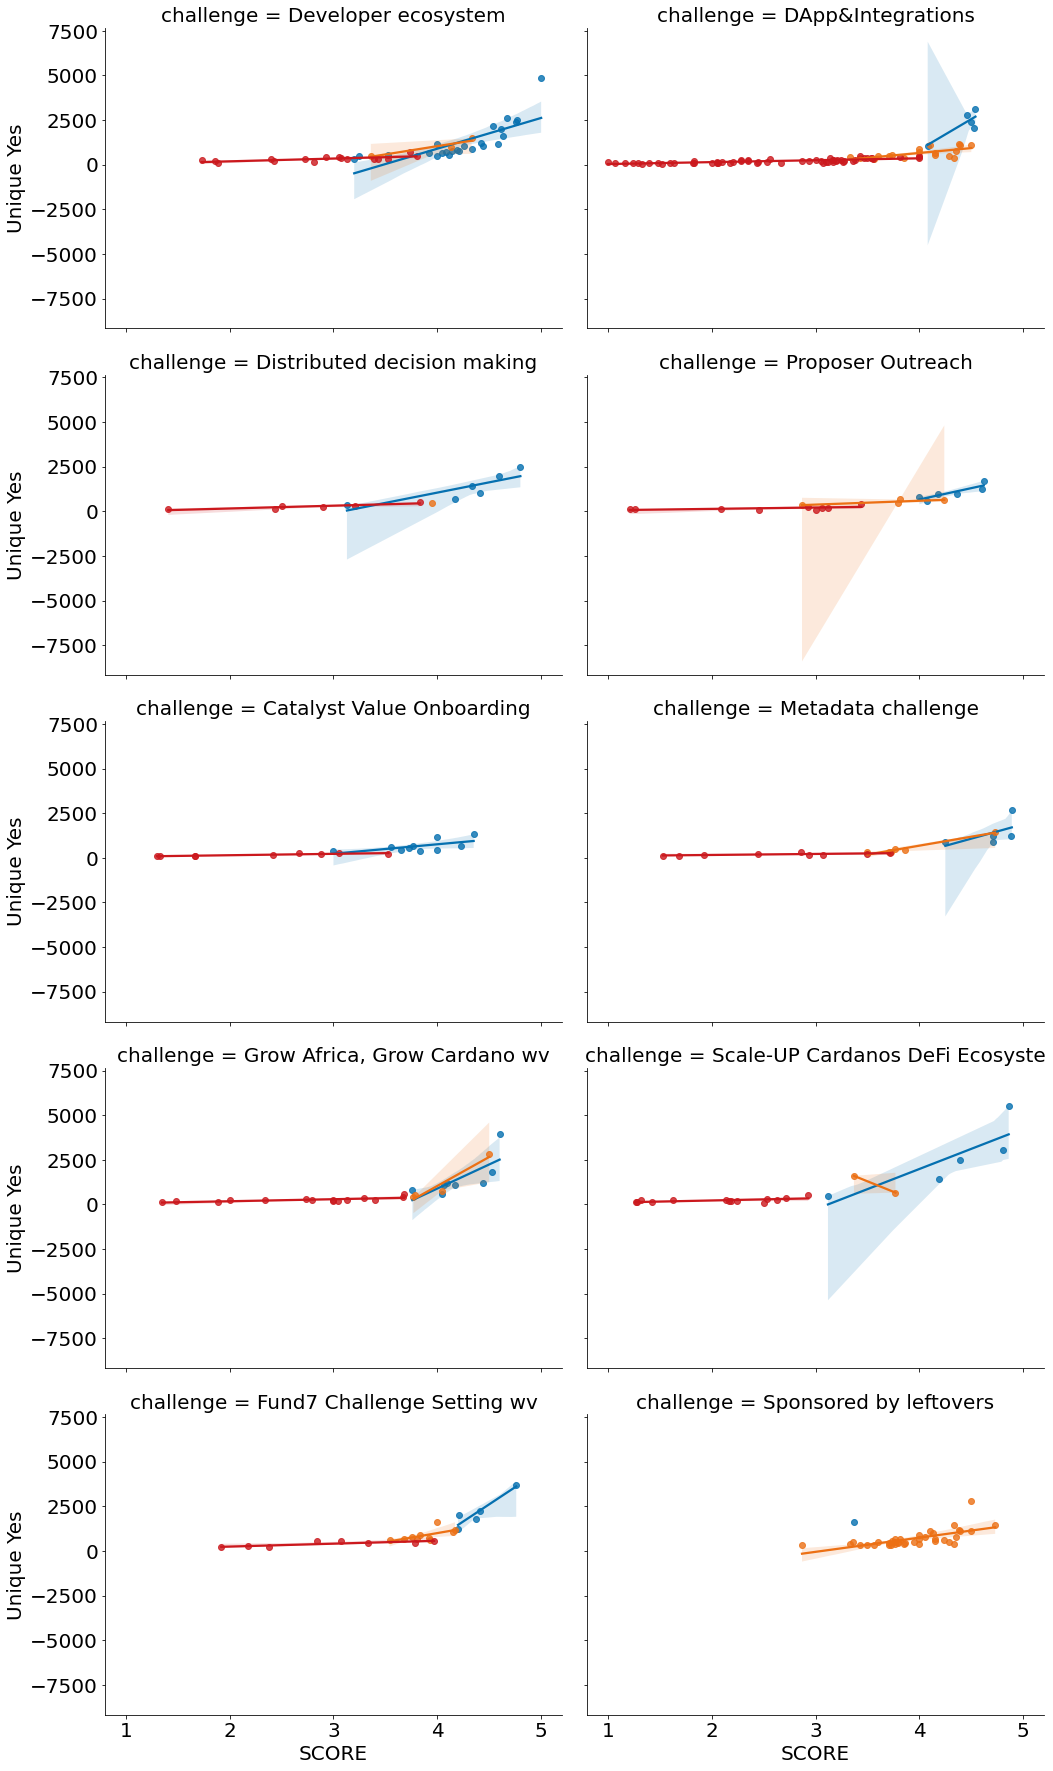

In [14]:
 f='f5'
fund_obj = catalyst_f_eda[f]
x_feat = 'SCORE'
y_feat = 'Unique Yes'
fit_reg = True
fund_obj.plot_lm(x_feat, y_feat, fit_reg)

### 

# CATALYST REPORT

In [ ]:
rprt = CatalystReport()

In [ ]:
rprt.funds

## Evolution()

In [ ]:
'''
Evolution of Catalyst over time. Numbers of: 
    proposals, 
    challenges, 
    active CAs, 
    active vCAs, 
    voting power, 
    unique wallets
'''
f = 'f5'

In [ ]:
catalyst_f_eda[f].get_results()

In [ ]:
catalyst_f_eda[f].proposals

In [ ]:
catalyst_f_eda[f].challenges

#### df_evolution

In [ ]:
prop_evol = pd.Series(map(lambda c: c.proposals.shape[0], catalyst_f_eda.values()), 
                      index=catalyst_f_eda.keys(),
                      name='proposals_evolution',
                      dtype=int)
ch_evol = pd.Series(map(lambda c: c.challenges.shape[0], catalyst_f_eda.values()), 
                      index=catalyst_f_eda.keys(),
                      name='challenges_evolution',
                      dtype=int)
df_evol = pd.concat([prop_evol,
                    ch_evol], 
                    axis='columns', ignore_index=False)
df_evol

### Plot all evolution time series

In [ ]:
# # set figure
# rcParams["font.size"] = 20
# rows = 1
# cols = len(df_evol.columns)
# rcParams['figure.figsize'] = 9*cols, 6*rows
# fig, axes = plt.subplots(nrows=rows, ncols=cols, num='plot_evol', clear=True, sharex=True, sharey=False)

# for idx, metric in enumerate(df_evol.columns):
    
#     ax = axes[idx]
#     df_evol[metric].plot(kind='bar', ax=ax, color='#045a8d')
    
#     ax.set_title('{}'.format(metric.replace('_',' ').capitalize()))
#     if idx==0: ax.set_ylabel('Count')
#     else: ax.set_ylabel('')
#     ax.set_xlabel('Funds')
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
# #     plt.subplots_adjust(wspace=0.05)
rprt.plot_evolution()

### Single evolution plot

In [ ]:
feat = 'proposals_evolution'

# # set figure
# rcParams["font.size"] = 20
# rcParams['figure.figsize'] = 9, 6
# fig, ax = plt.subplots(nrows=1, ncols=1, num='plot_sing_evol', clear=True)

# df_evol[feat].plot(kind='bar', ax=ax, color='#045a8d')

# # set axes
# ax.set_ylabel('Count')
# ax.set_xlabel('Funds')

# ax.set_title('{}'.format(feat.replace('_',' ').capitalize()))
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# # plt.subplots_adjust(wspace=0.05)

# # if save:
# #     pass
rprt.plot_single_evolution(feat)

In [ ]:
# set figure
rcParams["font.size"] = 40
rows = 1
cols = len(ALGS)
rcParams['figure.figsize'] = 9*cols, 6*rows
fig, axes = plt.subplots(nrows=rows, ncols=cols, num=db, clear=True, sharex=True, sharey=True)


for col_id, alg in enumerate(ALGS):

    color_it = itertools.cycle(self.COLORS)

    #load km-estimates file
    if alg in self.ESMAM_VARS:
        kmModels = pd.DataFrame(dic_matrix[alg][db][str(exp)])
    else:
        kmModels = pd.DataFrame(dic_matrix[alg][db])

    x = kmModels.times.values
    columns = list(kmModels.columns)
    columns.remove('times')

    ax = axes[col_id]
    for column in columns:
        if column == "population":
            ax.plot(x, kmModels[column], color='k', label='{}'.format(column), linestyle=':')
        else:
            ax.plot(x, kmModels[column], label='{}'.format(column), color=next(color_it))

    ax.set_title('{}'.format(alg))
    if col_id==0:
        ax.set_xlabel('Time')
        ax.set_ylabel('Survival probability')
    else:
        ax.set_xlabel('')
        ax.set_ylabel('')
    ax.set_ylim([0, 1])
    ax.set_yticks([0.5,1])
    ax.set_xlim([0, x[-1]+3])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend().set_visible(False)
    plt.xticks([])
    plt.subplots_adjust(wspace=0.05)